# Getting familiar with Movies_Metadata File

Reload dataset

In [4]:
path="C:/Users/Elsa/OneDrive/master/03_reve/data/"
metadata_file="movies_metadata.csv"
metadata=pd.read_csv(path+metadata_file,low_memory=False)
reves_metadata=metadata[metadata["revenue"]>0]
print(reves_metadata.shape)
print(reves_metadata.columns)

(7408, 24)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


#### Loading libraries and data

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
plt.style.use('ggplot')

In [310]:
#Set the path to the data files
path="C:/Users/Elsa/OneDrive/master/03_reve/data/"
metadata_file="movies_metadata.csv"

In [311]:
metadata=pd.read_csv(path+metadata_file,low_memory=False)
#The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. 
#Pandas tries to determine what dtype to set by analyzing the data in each column

#### Analyzing what we have

In [312]:
print(type(metadata))
print(metadata.shape)
print(metadata.columns)

<class 'pandas.core.frame.DataFrame'>
(45466, 24)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


We have a 45466 row DataFrame, with 24 columns or variables. At first sight, we are interested in the following columns
- Id
- Belongs to collection
- Budget
- Genres
- Popularity
- Production companies
- Production countries
- Release date
- **Revenue**
- Runtime
- Title


In [313]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [314]:
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [315]:
#print (metadata[pd.to_numeric(metadata['id'], errors='coerce').isnull()])

Apparently, seems like there are no null, but let's take a deeper look at each column

In [316]:
metadata[metadata.columns].dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

- Budget should be numeric
- Belongs_to_collection should be bool
- Id should be numeric

#### 0. Drop irrelevant info

Before continue analyzing, we should take a quick glance at the "apparently irrelevant" columns to decide if we drop them. This is not big data, but it could help with processing time.
    - Overview
    - Poster path
    - Tagline
    - Homepage
    - Original Title (won't affect the model)
    - Original language
    - Spoken languages
    -Video

In [317]:
metadata["overview"].head(3)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
Name: overview, dtype: object

In [318]:
metadata["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

It could be cool to analyze via NLP, but there's not enough info and not all movies have an overview

In [319]:
metadata["poster_path"].head(3)

0    /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1    /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2    /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
Name: poster_path, dtype: object

In [320]:
metadata["tagline"].head(3)

0                                                  NaN
1            Roll the dice and unleash the excitement!
2    Still Yelling. Still Fighting. Still Ready for...
Name: tagline, dtype: object

In [321]:
metadata["homepage"].head(3)

0    http://toystory.disney.com/toy-story
1                                     NaN
2                                     NaN
Name: homepage, dtype: object

In [322]:
metadata["original_title"].head(3)

0           Toy Story
1             Jumanji
2    Grumpier Old Men
Name: original_title, dtype: object

In [323]:
metadata["original_language"].head(3)

0    en
1    en
2    en
Name: original_language, dtype: object

In [324]:
metadata["spoken_languages"].head(3)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [325]:
metadata["video"].sample(3)

32171    False
2988     False
9157     False
Name: video, dtype: object

In [326]:
metadata=metadata.drop(["overview","poster_path","tagline","homepage","original_title","original_language","spoken_languages","video"],axis=1)

#### 0. Id

This will be the Key to join the different dataframes analyzed in this project. As we have established before, there are no missing values for this key-column, but type is wrong because it shouldn't be object but numeric. 

In [327]:
metadata["id"] =pd.to_numeric(metadata['id'], errors='coerce',downcast="integer")

In [328]:
metadata["id"].dtype

dtype('float64')

#### 1. Revenue

In [329]:
metadata["revenue"].describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [330]:
metadata["revenue"].isnull().sum()

6

First thing is first! The whole ponint to our model is being able to predict a movie revenue, so, this column is essential for this project. That's why the first thing we should do is find out how many movies do we have that actually have a registered value for the revenue. If this value is null, we will have to drop those rows.

As we found out in the previous cell, and also checked at metadata's stats, there are 6 null values in Revenue. Furthermore, we ought to check if we have values worth $0 revenue, because they'd be like null for us. 

In [331]:
metadata[metadata["revenue"]>0].shape

(7408, 16)

Out of 45466 movies, there are only 7408 rows with revenue metadata. We are going to create a new dataframe containing only the movies with revenue information, since it's essencial for our model. From now on, we would be using this new dataframe named "reves_metadata".

In [332]:
reves_metadata=metadata[metadata["revenue"]>0]

In [333]:
print(reves_metadata.shape)
print(reves_metadata.columns)

(7408, 16)
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


The new file has 7408 rows with the same 18 columns

In [334]:
print(reves_metadata["revenue"].describe())
print("-----")
print("There are %d null values in revenue column in this new dataframe" % (reves_metadata["revenue"].isnull().sum()))

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64
-----
There are 0 null values in revenue column in this new dataframe


Now let's check some random values. They seem like reasonable numbers for a movie revenue, don't they?

In [335]:
reves_metadata["revenue"].sample(10)

8127       3109904.0
32908       454516.0
39698     13000000.0
1552      16000000.0
6796     212011111.0
19527         4534.0
28214      4250507.0
13001     17869048.0
2602     215394738.0
1972     222300000.0
Name: revenue, dtype: float64

#### 2. Belongs to Collection

In [336]:
reves_metadata["belongs_to_collection"].head(10)

0     {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                   NaN
3                                                   NaN
4     {'id': 96871, 'name': 'Father of the Bride Col...
5                                                   NaN
8                                                   NaN
9     {'id': 645, 'name': 'James Bond Collection', '...
10                                                  NaN
12    {'id': 117693, 'name': 'Balto Collection', 'po...
13                                                  NaN
Name: belongs_to_collection, dtype: object

In [337]:
print(reves_metadata["belongs_to_collection"][0])
print ("Type for dicts elements is %s"%(type(reves_metadata["belongs_to_collection"][0])))

{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
Type for dicts elements is <class 'str'>


In [338]:
print(reves_metadata["belongs_to_collection"][1])
print ("Type for NaN elements is %s"%(type(reves_metadata["belongs_to_collection"][1])))

nan
Type for NaN elements is <class 'float'>


It seems that this column contains 2 different types of values: 

- If, indeed, the movie belongs to a series or a collection, the row contains a dict with the Id and the Name of that collection. 
- Otherwise, if the movie does not belong to a collection, the value is NaN. 

For our model, the valuable information is to know whether a movie belongs to a collection or not, because our assumption is that if it does, the expected revenue could be higher. 

Values different from NaN mean that they actually belong to a collection, so this could be simplified if translated into a dummie column where 0 means "Doesn't belong to collection" and 1 "Does belong to a collection". 

We will also create a  new column named "collection_info" with the id of the collection, in order to use it in the future if necessary. 

In [339]:
reves_metadata["collection_info"]=reves_metadata["belongs_to_collection"].copy()

C:\Users\Elsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [340]:
belongs_to_collection=[]
for element in reves_metadata["belongs_to_collection"]:
    if type(element)==str:
        belongs_to_collection.append(1)
    else:
        belongs_to_collection.append(0)

In [341]:
reves_metadata["belongs_to_collection"]=belongs_to_collection

C:\Users\Elsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [342]:
reves_metadata["belongs_to_collection"].head()

0    1
1    0
3    0
4    1
5    0
Name: belongs_to_collection, dtype: int64

In [343]:
print("There are %d movies that DO belong to a collection"%(reves_metadata["belongs_to_collection"]==1).sum())
print("There are %d movies that DON'T belong to any collection"%(reves_metadata["belongs_to_collection"]==0).sum())

There are 1483 movies that DO belong to a collection
There are 5925 movies that DON'T belong to any collection


#### 3. Budget

First, basic data exploring

In [344]:
reves_metadata["budget"].head()

0    30000000
1    65000000
3    16000000
4           0
5    60000000
Name: budget, dtype: object

In [345]:
reves_metadata["budget"].describe()

count     7408
unique     705
top          0
freq      2027
Name: budget, dtype: object

Surprise! Seems like values are not numeric! We should fix that.

In [346]:
reves_metadata["budget"]=pd.to_numeric(reves_metadata["budget"], errors="coerce")
reves_metadata["budget"]=reves_metadata["budget"].replace(0,np.nan)

C:\Users\Elsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [347]:
reves_metadata["budget"].dtype

dtype('float64')

Now we have to analyze, out of the 7408, how many movies contain budget information in order to determine if we can use this variable in our model. As it happened with "Revenue" seems like we have not nulls, but we have false positives, since a 0 budget is null for us and a perfectly "not null" value for Python. This column should be numeric and $0 budget should be Nan.

In [348]:
reves_metadata[reves_metadata["budget"]>0]["budget"].count()

5381

In [349]:
reves_metadata["budget"].sample(5)

2491     66000000.0
2358            NaN
30134    65000000.0
6660            NaN
3890     13000000.0
Name: budget, dtype: float64

Out of 7404 movies, 5381 have a valid value for budget. Is that enough data for our model?
Also, taking a deeper look at the values, seems that most of them are exact and round amounts, and they don't seem very accurate. Should we use this data in our model?

#### 4. Genres

In [350]:
reves_metadata["genres"].sample(5)

45250    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
1683     [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
12092    [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
11301    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
2599     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
Name: genres, dtype: object

In [351]:
print(reves_metadata["genres"][0])
print(reves_metadata["genres"][1])
print(reves_metadata["genres"][235])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 35, 'name': 'Comedy'}, {'id': 12, 'name': 'Adventure'}]


Seems that in this column, we can find a list of dicts that indicate the different movie genres associated to each movie. As we can see, there are many different generes associated to each movie, but not always the same ammount of them. First of all, we should find out how many different genres we've got, in order to decide what to do and how to use this information. 

Basic questions we should ask ourselves about the column "Genres":
- Should we create dummie variables with all the genres? 
- What's the maxium numbers of genres per movie we want to use in our model 
- ...
- Maybe we shoul just keep the id_genre info, and save the dict of (index,genre) outside the main dataframe, just for querys.


First, let's find out how many different genres we have got, and what's the maximum number of genres any of the movies has

In [352]:
#We will create a function as we will use it later with some other columns
def to_list (column):
    from ast import literal_eval
    new_column= column.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    return new_column

In [353]:
reves_metadata["genres"]=to_list(reves_metadata["genres"])

C:\Users\Elsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
reves_metadata["genres"].head(10)

0          [Animation, Comedy, Family]
1         [Adventure, Fantasy, Family]
3             [Comedy, Drama, Romance]
4                             [Comedy]
5     [Action, Crime, Drama, Thriller]
8        [Action, Adventure, Thriller]
9        [Adventure, Action, Thriller]
10            [Comedy, Drama, Romance]
12      [Family, Animation, Adventure]
13                    [History, Drama]
Name: genres, dtype: object

In [355]:
genres_lenghts=[]
for line in reves_metadata["genres"]:
    lenght=len(line)
    genres_lenghts.append(lenght)
print("There are a max of %d genres per movie"%(max(genres_lenghts)))

There are a max of 8 genres per movie


How many genres per movie are we using for out model?

In [356]:
np.mean(genres_lenghts)

2.4966252699784017

Maybe we should set up the maximux on 3. It's a reasonable number of categories for a variable. In case we do that, we would be assuming that the first 3 genres mentioned in this column would be the most reliable, and the ones that best describe the movie's storyline.

Let's see how many genres we've got just in case we want to create dummie columns for each of them.  

In [357]:
#We will create a function as we are going to do the same process with Production Companies and Production Countries.

def get_uniques(sequence):
    #from ast import literal_eval
    #sequence=sequence.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
    counter=[]
    for line in sequence:
        counter.append(line)
        flat_list=[item for sublist in sequence for item in sublist]
        for sublist in sequence:
            for item in sublist:
                flat_list.append(item)
        counter=list(set(flat_list))
        
        return counter

In [358]:
genres=get_uniques(reves_metadata["genres"])
print("There are %d unique genres"%(len(genres)))
genres

There are 20 unique genres


['Fantasy',
 'Family',
 'Action',
 'TV Movie',
 'Horror',
 'Drama',
 'Thriller',
 'History',
 'Mystery',
 'Music',
 'Adventure',
 'Crime',
 'Comedy',
 'Science Fiction',
 'Foreign',
 'War',
 'Documentary',
 'Animation',
 'Western',
 'Romance']

In [359]:
#we should do a barplot with the most common genres.

In [360]:
reves_metadata["genres"]

0                              [Animation, Comedy, Family]
1                             [Adventure, Fantasy, Family]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
5                         [Action, Crime, Drama, Thriller]
8                            [Action, Adventure, Thriller]
9                            [Adventure, Action, Thriller]
10                                [Comedy, Drama, Romance]
12                          [Family, Animation, Adventure]
13                                        [History, Drama]
14                                     [Action, Adventure]
15                                          [Drama, Crime]
16                                        [Drama, Romance]
17                                         [Crime, Comedy]
18                              [Crime, Comedy, Adventure]
19                                 [Action, Comedy, Crime]
20                               [Comedy, Thriller, Crim

In [361]:
genres_wc=[]
for element in reves_metadata["genres"]:
        for genre in element:
            genres_wc.append(genre)
genres_wc=Counter(genres_wc).most_common(20)
genres_wc

[('Drama', 3683),
 ('Comedy', 2607),
 ('Thriller', 1872),
 ('Action', 1736),
 ('Romance', 1437),
 ('Adventure', 1120),
 ('Crime', 1086),
 ('Science Fiction', 747),
 ('Horror', 735),
 ('Family', 678),
 ('Fantasy', 630),
 ('Mystery', 550),
 ('Animation', 385),
 ('History', 295),
 ('Music', 267),
 ('War', 244),
 ('Documentary', 221),
 ('Western', 117),
 ('Foreign', 84),
 ('TV Movie', 1)]

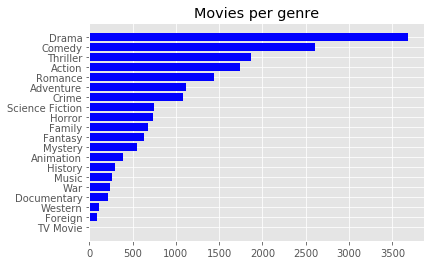

In [362]:
x=[]
y=[]
for genre in genres_wc:
    x.append(genre[0])
    y.append(genre[1])
    
fig, ax = plt.subplots()
ax.barh(x, y, color='blue')
ax.invert_yaxis()
ax.set_title('Movies per genre')
plt.show()

#### 5. Popularity

In [363]:
reves_metadata["popularity"].describe()

count         7408
unique        7401
top       9.091288
freq             2
Name: popularity, dtype: object

In [364]:
reves_metadata["popularity"].sample(5)

15873    1.280455
3043     9.091636
17421    1.932489
8293     0.680407
4858      7.74579
Name: popularity, dtype: object

In [365]:
print(reves_metadata["popularity"].max())
print(reves_metadata["popularity"].min())

96.272374
0.000308


For what we can infer from data, popularity could be kind of a rating, but we don't actually know what it means nor how the data was collected. We should't use this info as a variable in our model since we can't explain how "this number" affects to the prediction. 

In [366]:
reves_metadata=reves_metadata.drop("popularity",axis=1)

#### 6. Production Companies

In [367]:
reves_metadata["production_companies"].head(5)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
5    [{'name': 'Regency Enterprises', 'id': 508}, {...
Name: production_companies, dtype: object

Same as it happened with genres. Contains a list of dicts.

In [368]:
reves_metadata["production_companies"]=to_list(reves_metadata["production_companies"])

In [369]:
reves_metadata["production_companies"].head(5)

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
5    [Regency Enterprises, Forward Pass, Warner Bros.]
Name: production_companies, dtype: object

In [370]:
production_companies=get_uniques(reves_metadata["production_companies"])
print("There are %d unique production companies"%(len(production_companies)))
production_companies

There are 7091 unique production companies


['Euskal Irrati Telebisa (EITB)',
 'U-Film Malta',
 'Ega Medios Audiovisuales',
 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG',
 'McMurdo (Canada) Productions',
 'Unisol 3 Distribution',
 'Nancy Tenenbaum Films',
 'Paradise City',
 'Inflammable Films',
 'Centre National de la Cinématographie',
 'WDR',
 'Novo Arturo Films',
 'Cecchi Gori Group',
 'SLM Production Group',
 'Gladden Entertainment',
 'Forum Films',
 'Swargachitra',
 'Ariane Mararía Films',
 'Keep Your Head',
 'First Thought Films',
 'Vertigo Productions',
 'Jonathan Krane Group',
 'Senator Entertainment Co',
 'Rolling Film Entertainment',
 'Danish Film Institute',
 'Seagal/Nasso Productions',
 'Sunley Productions Ltd.',
 'Alpha Productions',
 'Imaginarium Entertainment Group',
 'Head Gear Films',
 'Kadokawa Pictures',
 'ScreenWest',
 'Metrol Technology',
 'S & L Films',
 'Concord Productions Inc.',
 'Scamp Film and Theatre Ltd.',
 'Muskat Filmed Properties',
 'Embassy Pictures Corporation',
 'Batjac Prod

There are 7091 unique production companies, way too many production companies for our model. Maybe we should get the most common ones, or the 20% that represent the 80% of the movies. (Around 6K movies). 

Let's analyze the most common Production Companies

In [371]:
from collections import Counter
companies_wc=[]
for element in reves_metadata["production_companies"]:
        for company in element:
            companies_wc.append(company)
Counter(companies_wc).most_common(10)

[('Warner Bros.', 491),
 ('Universal Pictures', 463),
 ('Paramount Pictures', 395),
 ('Twentieth Century Fox Film Corporation', 341),
 ('Columbia Pictures', 236),
 ('Metro-Goldwyn-Mayer (MGM)', 207),
 ('New Line Cinema', 198),
 ('Touchstone Pictures', 158),
 ('Walt Disney Pictures', 147),
 ('Columbia Pictures Corporation', 140)]

We cant't just take the most common ones, since there will be movies without any value for "production company". We have to make sure that we leave, at least, one production company for every movie.

In [372]:
production_company=[]
for element in reves_metadata["production_companies"]:
    if len(element)>0:
        first_company=element[0]
        production_company.append(first_company)
    else:
        first_company=""
        production_company.append(first_company)

In [373]:
reves_metadata["production_company"]=production_company

In [374]:
reves_metadata["production_company"].head(5)

0                   Pixar Animation Studios
1                          TriStar Pictures
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
5                       Regency Enterprises
Name: production_company, dtype: object

In [375]:
company_wc=[]
for element in reves_metadata["production_company"]:
        company_wc.append(element)
Counter(company_wc).most_common(6)

[('', 411),
 ('Universal Pictures', 401),
 ('Paramount Pictures', 391),
 ('Twentieth Century Fox Film Corporation', 291),
 ('Columbia Pictures', 235),
 ('New Line Cinema', 187)]

In [376]:
production_companies_lenghts=[]
for line in reves_metadata["production_companies"]:
    lenght=len(line)
    production_companies_lenghts.append(lenght)
print("There are a max of %d production companies per movie"%(max(production_companies_lenghts)))
print("The mean number of production companies per movie is %f"%(np.mean(production_companies_lenghts)))

There are a max of 26 production companies per movie
The mean number of production companies per movie is 2.747300


In [377]:
from scipy import stats
stats.describe(production_companies_lenghts)

DescribeResult(nobs=7408, minmax=(0, 26), mean=2.7473002159827216, variance=4.780470636468158, skewness=2.31220766179745, kurtosis=10.933701520890173)

#### 7. Production Countries

In [378]:
reves_metadata["production_countries"].sample(5)

1679     [{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...
24982     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
16725    [{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...
15357    [{'iso_3166_1': 'US', 'name': 'United States o...
6020     [{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...
Name: production_countries, dtype: object

Almost same as before

In [379]:
reves_metadata["production_countries"]=to_list(reves_metadata["production_countries"])
production_countries=get_uniques(reves_metadata["production_countries"])
print("There are %d unique production countries"%(len(production_countries)))
production_countries[:10]

There are 98 unique production countries


['Pakistan',
 'Mali',
 'Angola',
 'Venezuela',
 'Jordan',
 'Thailand',
 'Qatar',
 'Palestinian Territory',
 'Uruguay',
 'Morocco']

In [380]:
countries_wc=[]
for element in reves_metadata["production_countries"]:
        for country in element:
            countries_wc.append(country)
Counter(countries_wc).most_common(5)

[('United States of America', 5623),
 ('United Kingdom', 917),
 ('France', 576),
 ('Germany', 412),
 ('Canada', 323)]

This doesn't mean that 5 countries represent 7851 movies... We have to make sure that we make the cut leaving at least 1 country per movie. We should assume that the first country listed is the one, and take it as a reference. Then, make the countries list from that.

In [381]:
reves_metadata["production_countries"][9][0]

'United Kingdom'

In [382]:
reves_metadata["production_countries"][0][0]

'United States of America'

In [383]:
production_country=[]
for element in reves_metadata["production_countries"]:
    if len(element)>0:
        first_country=element[0]
        production_country.append(first_country)
    else:
        first_country=""
        production_country.append(first_country)

In [384]:
reves_metadata["production_countries"].sample(10)

12518                             [France, Tunisia]
36893        [Germany, Netherlands, United Kingdom]
65                       [United States of America]
1030                     [United States of America]
6361                     [United States of America]
6378                     [United States of America]
1258                     [United States of America]
29625                    [United States of America]
12467                    [United States of America]
10554    [United Kingdom, United States of America]
Name: production_countries, dtype: object

In [385]:
reves_metadata["production_country"]=production_country

In [386]:
reves_metadata["production_country"].head()

0    United States of America
1    United States of America
3    United States of America
4    United States of America
5    United States of America
Name: production_country, dtype: object

In [387]:
country_wc=[]
for element in reves_metadata["production_country"]:
        country_wc.append(element)
Counter(country_wc).most_common(6)

[('United States of America', 4497),
 ('United Kingdom', 548),
 ('France', 354),
 ('Canada', 267),
 ('Germany', 224),
 ('India', 204)]

#### 8. Release Date

Release Date can be a very significant variable in our model since we assume that the movies released nearby certain months or times of the year, can reach more revenue more easily. 

In [388]:
print(reves_metadata["release_date"].sample(5))
print("There are %d null values" % (reves_metadata["release_date"].isnull().sum()))

198      1995-10-27
19956    2011-07-03
30942    2015-10-09
24139    2014-09-19
41669    1987-04-09
Name: release_date, dtype: object
There are 1 null values


In [389]:
type(reves_metadata["release_date"][2255])

str

Info is stored in string format, so we should transform that to Date format, in order to be useful. We could also create new columns just storing the year and the month, since the day or the exact date wont be necessary.

In [390]:
datetime=[]
for element in reves_metadata["release_date"]:
    if type(element)==str:
        date=pd.to_datetime(element, infer_datetime_format=True)
        datetime.append(date)
    else:
        date=element
        datetime.append(date)
reves_metadata["datetime"]=datetime       

In [391]:
type(reves_metadata["datetime"][5])

pandas._libs.tslibs.timestamps.Timestamp

In [392]:
reves_metadata["datetime"].head()

0   1995-10-30
1   1995-12-15
3   1995-12-22
4   1995-02-10
5   1995-12-15
Name: datetime, dtype: datetime64[ns]

Now we have a valid timestamp field for date

#### 9. Runtime

In [393]:
reves_metadata["runtime"].sample(5)

7170     121.0
3830      84.0
1635     120.0
10014    112.0
9170      87.0
Name: runtime, dtype: float64

In [394]:
print("Maximum runtime is %d days"%(reves_metadata["runtime"].max()))
print("Minimun runtime is %d days"%(reves_metadata["runtime"].min()))

Maximum runtime is 338 days
Minimun runtime is 0 days


Seems like runtime means how many days the movie has been running on cinemas. The min is 0, and that should mean that some movies have not been released. We should check if that's true, because if they have not been released, they shouldn't have revenue. 

In [395]:
not_released=reves_metadata[reves_metadata["runtime"]<=0]
print("There are %d movies with 0-day runtime"%(len(not_released)))
print("%d of them have revenue greater than $0"%(len(not_released[not_released["revenue"]>0])))

There are 21 movies with 0-day runtime
21 of them have revenue greater than $0


Should we drop this movies?

In [396]:
not_released[not_released["revenue"]>0]

,adult,belongs_to_collection,budget,genres,id,imdb_id,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_info,production_company,production_country,datetime
28876,False,0,NaN,[],94236.0,tt0108234,[],[],1993-03-12,841.0,0.0,Released,Street Knight,7.0,5.0,NaN,,,1993-03-12
30039,False,0,336029.0,"[Drama, Comedy]",41703.0,tt1224449,[],[],2008-08-21,927277.0,0.0,Released,Plus one,4.0,6.0,NaN,,,2008-08-21
30194,False,1,5579750.0,[Comedy],161545.0,tt2456720,"[Fandango, Rai Cinema]",[Italy],2012-11-30,8927600.0,0.0,Released,Tutto tutto niente niente,4.8,54.0,"{'id': 188197, 'name': 'Cetto La Qualunque - C...",Fandango,Italy,2012-11-30
31068,False,0,2500000.0,"[Drama, Foreign, Romance]",21905.0,tt0409527,[],[India],2005-02-04,3100000.0,0.0,Released,Shabd,5.0,1.0,NaN,,India,2005-02-04
31291,False,0,NaN,[Drama],143344.0,tt1190905,"[Televisión Española (TVE), Instituto de la Ci...",[Spain],2008-11-07,404075.0,0.0,Released,El truco del manco,6.3,2.0,NaN,Televisión Española (TVE),Spain,2008-11-07
31518,False,0,6843500.0,[Comedy],147868.0,tt2550838,[Colorado Film Production],[Italy],2012-12-22,10703234.0,0.0,Released,The Worst Christmas of My Life,5.5,86.0,NaN,Colorado Film Production,Italy,2012-12-22
31526,False,0,11000000.0,[Comedy],77944.0,tt2076251,"[Colorado Film Production, Film Commission Reg...",[Italy],2011-10-27,12935800.0,0.0,Released,La peggior settimana della mia vita,5.9,96.0,NaN,Colorado Film Production,Italy,2011-10-27
32684,False,0,NaN,[Comedy],217414.0,tt2604346,"[Televisión Española (TVE), AXN, Televisió de ...",[Spain],2013-11-15,850259.0,0.0,Released,¿Quién mató a Bambi?,5.7,22.0,NaN,Televisión Española (TVE),Spain,2013-11-15
32958,False,0,NaN,[Comedy],315335.0,tt4216934,"[Little Shark Entertainment GmbH, Seven Pictur...",[Germany],2015-01-15,9127383.0,0.0,Released,Frau Müller muss weg!,5.9,25.0,NaN,Little Shark Entertainment GmbH,Germany,2015-01-15
33996,False,0,NaN,"[Fantasy, Horror, Science Fiction, Foreign]",59095.0,tt0278675,"[Romulus Films, Cyclops Vision, Miracle Commun...",[United Kingdom],2001-04-12,10000000.0,0.0,Released,Revelation,2.9,9.0,NaN,Romulus Films,United Kingdom,2001-04-12


#### 10. Title

In [397]:
reves_metadata["title"].sample(10)

6714                                School of Rock
10535                       Get Rich or Die Tryin'
11845                             Ocean's Thirteen
12584            Expelled: No Intelligence Allowed
4935                        The Mothman Prophecies
6106                                Salaam Bombay!
5898                                Secret Admirer
27459    El asombroso mundo de Borjamari y Pocholo
2509                                      Trippin'
4344                                    Bad Dreams
Name: title, dtype: object

Title data seems to be ok!

#### 11. Adult

In [398]:
reves_metadata.groupby("adult").count()

,belongs_to_collection,budget,genres,id,imdb_id,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_info,production_company,production_country,datetime
adult,,,,,,,,,,,,,,,,,,
False,7408,5381,7408,7408,7408,7408,7408,7407,7408,7402,7406,7408,7408,7408,1483,7408,7408,7407


Adult doesn't have True values for the movies in the revenue-filtered dataframe, so this column won't be necessary for out model. We can drop it.

In [399]:
reves_metadata=reves_metadata.drop("adult",axis=1)

#### 12. Status

In [400]:
reves_metadata.groupby("status").count()

,belongs_to_collection,budget,genres,id,imdb_id,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,collection_info,production_company,production_country,datetime
status,,,,,,,,,,,,,,,,,
Post Production,5,2,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5
Released,7395,5377,7395,7395,7395,7395,7395,7395,7395,7389,7395,7395,7395,1481,7395,7395,7395
Rumored,6,2,6,6,6,6,6,6,6,6,6,6,6,2,6,6,6


In [401]:
print(reves_metadata["status"][44904])
print(reves_metadata["runtime"][44904])

Post Production
99.0


!= from Released doesn't mean 0-day runtime

#### 12. Redefining our final DataFrame

Now that we have explored the data, now we have to clean our DataSet and prepare a final DataFrame just with the info and the transformed columns that we need to create our model. We should drop the columns that aren't valuable, and make new dummie columns.

In [402]:
reves_metadata.shape

(7408, 18)

In [403]:
reves_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'collection_info', 'production_company', 'production_country',
       'datetime'],
      dtype='object')

In [404]:
reves_metadata.head(5)

,belongs_to_collection,budget,genres,id,imdb_id,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,collection_info,production_company,production_country,datetime
0,1,30000000.0,"[Animation, Comedy, Family]",862.0,tt0114709,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,"{'id': 10194, 'name': 'Toy Story Collection', ...",Pixar Animation Studios,United States of America,1995-10-30
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,tt0113497,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,TriStar Pictures,United States of America,1995-12-15
3,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,tt0114885,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,NaN,Twentieth Century Fox Film Corporation,United States of America,1995-12-22
4,1,NaN,[Comedy],11862.0,tt0113041,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,"{'id': 96871, 'name': 'Father of the Bride Col...",Sandollar Productions,United States of America,1995-02-10
5,0,60000000.0,"[Action, Crime, Drama, Thriller]",949.0,tt0113277,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,Released,Heat,7.7,1886.0,NaN,Regency Enterprises,United States of America,1995-12-15


Still have to drop some columns, not longer usefull. We will do it in our final DataFrame so we still have this info (just in case) in reves_metadata

In [405]:
final_reves_metadata=reves_metadata.drop(["production_companies","production_countries","collection_info","imdb_id"],axis=1)

In [410]:
print(final_reves_metadata.shape)
print(final_reves_metadata.columns)

(7408, 14)
Index(['belongs_to_collection', 'budget', 'genres', 'id', 'release_date',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'production_company', 'production_country', 'datetime'],
      dtype='object')


After all the transformations, we have a new DataFrame with 7408 rows and 14 columns.

In [411]:
final_reves_metadata.head(3)

,belongs_to_collection,budget,genres,id,release_date,revenue,runtime,status,title,vote_average,vote_count,production_company,production_country,datetime
0,1,30000000.0,"[Animation, Comedy, Family]",862.0,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Pixar Animation Studios,United States of America,1995-10-30
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,TriStar Pictures,United States of America,1995-12-15
3,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,Twentieth Century Fox Film Corporation,United States of America,1995-12-22


One group of variables that we need for each movie id are those related to the genres. We need to create a new column for each of the 20 genres, and use 0 or 1 values to show if that movie has that genre associated

### 11. Joining tables

We have analyzed the different csv files on their own, but now that we know what we want to do with each of them, and what info do we need, we should join them in a unique dataframe